In [27]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load the data
df = pd.read_csv(r"C:\Users\Erensu Akdogan\Downloads\marketing_customer_analysis_clean (3).csv")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed:_0                     10910 non-null  int64  
 1   customer                       10910 non-null  object 
 2   state                          10910 non-null  object 
 3   customer_lifetime_value        10910 non-null  float64
 4   response                       10910 non-null  object 
 5   coverage                       10910 non-null  object 
 6   education                      10910 non-null  object 
 7   effective_to_date              10910 non-null  object 
 8   employmentstatus               10910 non-null  object 
 9   gender                         10910 non-null  object 
 10  income                         10910 non-null  int64  
 11  location_code                  10910 non-null  object 
 12  marital_status                 10910 non-null 

In [35]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
import matplotlib.pyplot as plt

categoricals = df.select_dtypes(include = object)
categoricals


,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2011-02-18,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,A
1,KX64629,California,No,Basic,College,2011-01-18,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,A
2,LZ68649,Washington,No,Basic,Bachelor,2011-02-10,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,2011-01-11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,2011-01-17,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,2011-01-19,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,2011-01-06,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2011-02-06,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,A
10908,WA60547,California,No,Premium,College,2011-02-13,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [36]:

ordinals = categoricals[["coverage","education","vehicle_size"]]
nominals = categoricals.drop(columns=["coverage","education","vehicle_size"])

#overriding the variables with ordinal encoding

from sklearn.preprocessing import OrdinalEncoder
enc1 = OrdinalEncoder(categories = [['Basic', 'Extended', 'Premium']])
ordinals['coverage']=enc1.fit_transform(ordinals[['coverage']])
enc2 = OrdinalEncoder(categories = [['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor']])
ordinals['education']=enc2.fit_transform(ordinals[['education']])
enc3 = OrdinalEncoder(categories = [['Small', 'Medsize', 'Large']])
ordinals['vehicle_size']=enc3.fit_transform(ordinals[['vehicle_size']])
ordinals   

C:\Users\Erensu Akdogan\AppData\Local\Temp\ipykernel_27044\2505687025.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinals['coverage']=enc1.fit_transform(ordinals[['coverage']])
C:\Users\Erensu Akdogan\AppData\Local\Temp\ipykernel_27044\2505687025.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinals['education']=enc2.fit_transform(ordinals[['education']])
C:\Users\Erensu Akdogan\AppData\Local\Temp\ipykernel_27044\2505687025.py:12: SettingWithCopyWarning: 
A value is trying to be set on a co

,coverage,education,vehicle_size
0,0.0,2.0,1.0
1,0.0,2.0,1.0
2,0.0,1.0,1.0
3,1.0,2.0,1.0
4,2.0,1.0,1.0
...,...,...,...
10905,2.0,1.0,1.0
10906,0.0,2.0,1.0
10907,1.0,1.0,1.0
10908,2.0,2.0,1.0


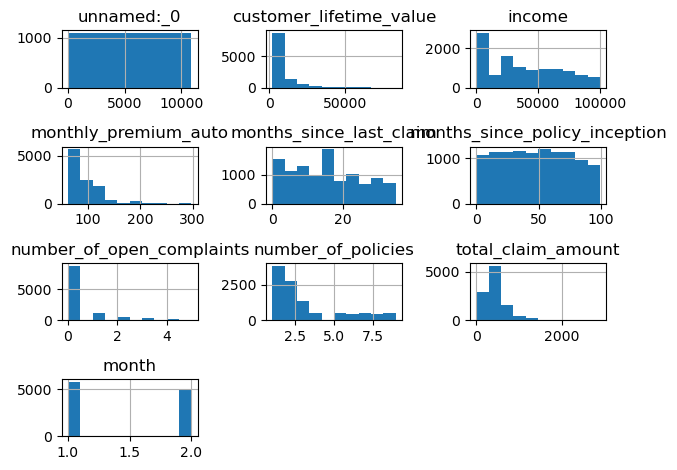

In [28]:
# exercise 2 -checking for the numerical data and picking up variables-
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
numerical = df.select_dtypes(include = 'number')

varA=df[['customer_lifetime_value']]
varB=df[['total_claim_amount']]
numerical.hist()
plt.tight_layout()

In [29]:
scaler = MinMaxScaler()
scaler2 = StandardScaler()
varA= scaler.fit_transform(varA)
varB= scaler2.fit_transform(varB)


(array([8.665e+03, 1.431e+03, 4.940e+02, 1.770e+02, 9.500e+01, 2.500e+01,
       1.400e+01, 5.000e+00, 3.000e+00, 1.000e+00]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <BarContainer object of 10 artists>)


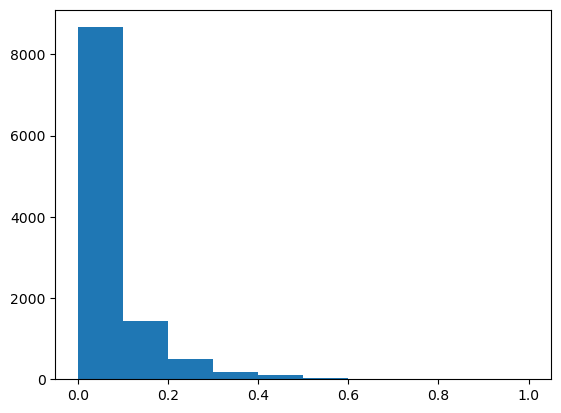

In [30]:
import matplotlib.pyplot as plt

print(plt.hist(varA))


(array([2.928e+03, 5.667e+03, 1.529e+03, 4.680e+02, 2.200e+02, 4.300e+01,
       3.300e+01, 1.500e+01, 5.000e+00, 2.000e+00]), array([-1.48815259, -0.49791788,  0.49231683,  1.48255153,  2.47278624,
        3.46302095,  4.45325565,  5.44349036,  6.43372507,  7.42395977,
        8.41419448]), <BarContainer object of 10 artists>)


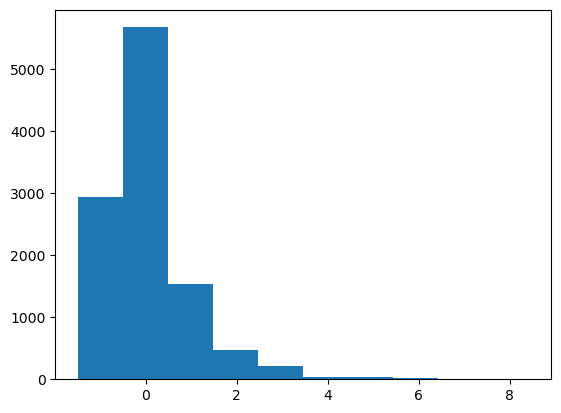

In [25]:
print(plt.hist(varB))

varA scaled: [[0.03575222]
 [0.00405905]
 [0.16026441]
 ...
 [0.27012165]
 [0.12371724]
 [0.06090719]]


NameError: name 'varB_scaled' is not defined